<a href="https://colab.research.google.com/github/naufaldi001/Data-Analyst-Career-Track/blob/main/Machine_Learning_Mini_Project_X_DqLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Divisi e-commerce kita ingin memprediksi apakah user- user yang sedang mengunjungi halaman website yang baru akan mengklik banner promo (ads) di halaman tersebut atau tidak berdasarkan feature yang ada. Tolong buatkan machine learning model untuk menyelesaikan permasalahan dari e-commerce kita ini ya.”

# Data Exploratory

In [ ]:
#import library 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Baca data 'ecommerce_banner_promo.csv'
data = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/ecommerce_banner_promo.csv')

#1. Data eksplorasi dengan head(), info(), describe(), shape
print("\n[1] Data eksplorasi dengan head(), info(), describe(), shape")
print("Lima data teratas:")
print(data.head())
print("Informasi dataset:")
print(data.info())
print("Statistik deskriptif dataset:")
print(data.describe())
print("Ukuran dataset:")
print(data.shape)


[1] Data eksplorasi dengan head(), info(), describe(), shape
Lima data teratas:
   Daily Time Spent on Site  Age  ...        Timestamp  Clicked on Ad
0                     68.95   35  ...   3/27/2016 0:53              0
1                     80.23   31  ...    4/4/2016 1:39              0
2                     69.47   26  ...  3/13/2016 20:35              0
3                     74.15   29  ...   1/10/2016 2:31              0
4                     68.37   35  ...    6/3/2016 3:36              0

[5 rows x 10 columns]
Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line   

Adapun feature - feature dalam dataset ini adalah :


*   'Daily Time Spent on Site' : lama waktu user mengunjungi site (menit)
*   'Age' : usia user (tahun)
*   'Area Income' : rata - rata pendapatan di daerah sekitar user
*   'Daily Internet Usage' : rata - rata waktu yang dihabiskan user di internet dalam sehari (menit)
*   'Ad Topic Line' : topik/konten dari promo banner
*   'Country' : negara dimana user mengakses website
*   'Timestamp' : waktu saat user mengklik promo banner atau keluar dari halaman website tanpa mengklik banner
*   'Clicked on Ad' : mengindikasikan user mengklik promo banner atau tidak (0 = tidak; 1 = klik).
 



In [ ]:
#2. Data eksplorasi dengan dengan mengecek korelasi dari setiap feature menggunakan fungsi corr()
print(data.corr())

#3. Data eksplorasi dengan mengecek distribusi label menggunakan fungsi groupby() dan size()
print(data.groupby('Clicked on Ad').size())

                          Daily Time Spent on Site  ...  Clicked on Ad
Daily Time Spent on Site                  1.000000  ...      -0.748117
Age                                      -0.331513  ...       0.492531
Area Income                               0.310954  ...      -0.476255
Daily Internet Usage                      0.518658  ...      -0.786539
Male                                     -0.018951  ...      -0.038027
Clicked on Ad                            -0.748117  ...       1.000000

[6 rows x 6 columns]
Clicked on Ad
0    500
1    500
dtype: int64


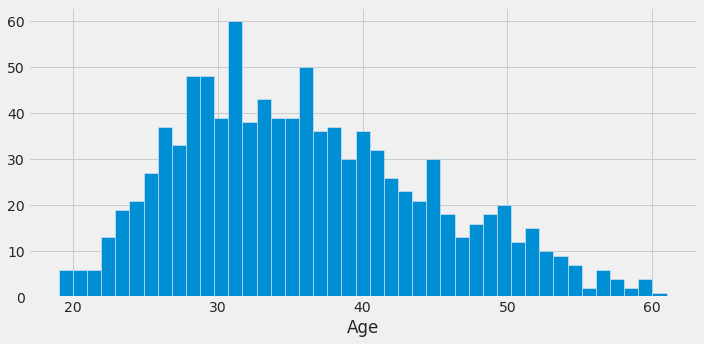

<Figure size 432x288 with 0 Axes>

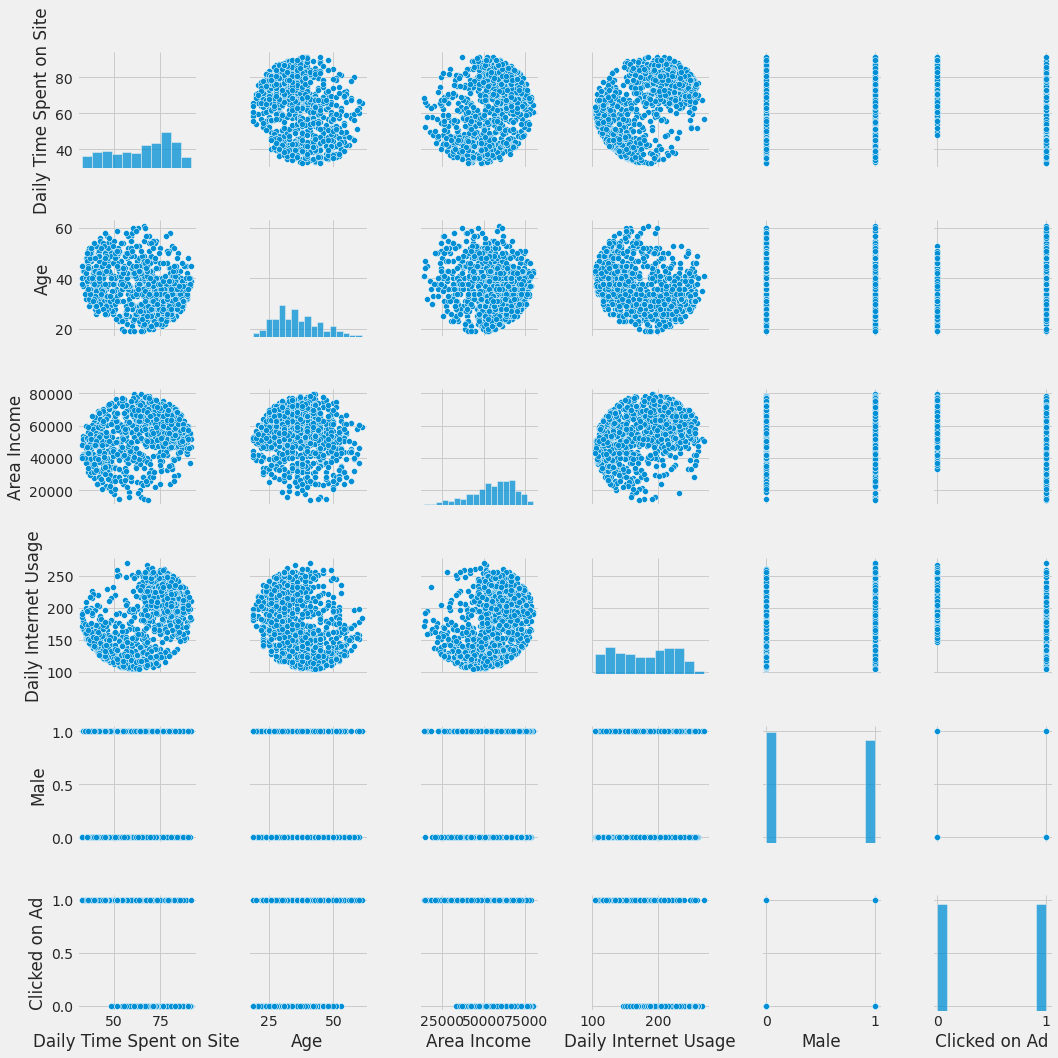

In [ ]:
# Seting: matplotlib and seaborn
sns.set_style('whitegrid')  
plt.style.use('fivethirtyeight')

#4. Data eksplorasi dengan visualisasi
#4a. Visualisasi Jumlah user dibagi ke dalam rentang usia (Age) menggunakan histogram (hist()) plot
plt.figure(figsize=(10, 5))
plt.hist(data['Age'], bins = data.Age.nunique())
plt.xlabel('Age')
plt.tight_layout()
plt.show()

#4b. Gunakan pairplot() dari seaborn (sns) modul untuk menggambarkan hubungan setiap feature.
plt.figure()
sns.pairplot(data)
plt.show()

In [ ]:
#5. Cek missing value
print(data.isnull().sum().sum())

0


# Pemodelan dengan Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#pemodelan dengan Logistic Regression, gunakan perbandingan 80:20 untuk training vs testing
print("\n[6] Lakukan pemodelan dengan Logistic Regression, gunakan perbandingan 80:20 untuk training vs testing")
#6a.Drop Non-Numerical (object type) feature from X, as Logistic Regression can only take numbers, and also drop Target/label, assign Target Variable to y.   
X = data.drop(['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'], axis = 1)
y = data['Clicked on Ad']

#6b. splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#6c. Modelling
# Call the classifier
logreg = LogisticRegression()
# Fit the classifier to the training data
logreg = logreg.fit(X_train,y_train)
# Prediksi model
y_pred = logreg.predict(X_test)

#6d. Evaluasi Model Performance
print("Evaluasi Model Performance:")
print("Training Accuracy :", logreg.score(X_train, y_train))
print("Testing Accuracy :", logreg.score(X_test, y_test))


[6] Lakukan pemodelan dengan Logistic Regression, gunakan perbandingan 80:20 untuk training vs testing
Evaluasi Model Performance:
Training Accuracy : 0.9
Testing Accuracy : 0.9


**Melihat performansi model dengan menggunakan confusion matrix dan classification report**

In [ ]:
# Import library
from sklearn.metrics import confusion_matrix, classification_report

#7. Print Confusion matrix dan classification report
print("\n[7] Print Confusion matrix dan classification report")

#apply confusion_matrix function to y_test and y_pred
print("Confusion matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

#apply classification_report function to y_test and y_pred
print("Classification report:")
cr = classification_report(y_test, y_pred)
print(cr)


[7] Print Confusion matrix dan classification report
Confusion matrix:
[[85  4]
 [16 95]]
Classification report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89        89
           1       0.96      0.86      0.90       111

    accuracy                           0.90       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.90      0.90       200

